In [11]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import graphviz
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from   sklearn.linear_model import LinearRegression
from   sklearn.metrics import r2_score
from statsmodels.genmod.bayes_mixed_glm import patsy
from patsy import dmatrix
import statsmodels.api as sm
import os

import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from pandas.core.common import random_state
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import sequential_feature_selector
from mlxtend.feature_selection import SequentialFeatureSelector

df = pd.read_csv('./previsao_de_renda.csv')
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None


metadata=pd.DataFrame(df.dtypes, columns=['tipo'])
metadata['n_categorias'] = 0

for var in metadata.index:
  metadata.loc[var, 'n_categorias'] = len(df.groupby([var]).size())



for var in metadata[metadata['tipo'] == 'object'].index:
    df = convert_dummy(df, var)
metadata=pd.DataFrame(df.dtypes, columns=['tipo'])
metadata['n_categorias'] = 0

# Tirando a v. resposta da base de treinamento
x = df.drop("renda",axis = 1)
y = df["renda"]

# Tirando ID da base de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

x=df.drop('renda',axis=1).values
y=df['renda'].values









In [22]:
df.dropna()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,2016-03-01,11477,M,True,False,0,Empresário,Superior incompleto,Casado,Casa,32,9.849315,2.0,1592.57
14995,14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14997,14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [28]:
idade=str((df['idade'].max()))
emprego=str((df['tempo_emprego'].max()))
qrenda=str((df['renda'].max()))

In [30]:
os.makedirs('./projeto2023/idade'+idade, exist_ok=True)
os.makedirs('./projeto2023/emprego'+emprego, exist_ok=True)
os.makedirs('./projeto2023/qrenda'+qrenda, exist_ok=True)

In [33]:
plota_pivot_table(df, 'renda', ['idade', 'qtd_filhos'], 'mean', 'media renda','idade','unstack')
plt.savefig('./projeto2023/idade'+idade+'/media renda por idade.png')

plota_pivot_table(df, 'renda', ['tempo_emprego', 'idade'], 'mean', 'media renda','tempo_emprego','unstack')
plt.savefig('./projeto2023/emprego'+tempo_emprego+'/media renda por tempo_emprego.png')

plota_pivot_table(df, 'renda', ['qt_pessoas_residencia', 'qtd_filhos'], 'mean', 'media da renda','qt_filhos','unstack')
plt.savefig('./projeto2023/qrenda'+max_data_jan+'/media renda.png')


KeyError: 'sexo'

In [4]:
metadata

,tipo,n_categorias
Unnamed: 0,int64,0
id_cliente,int64,0
posse_de_veiculo,bool,0
posse_de_imovel,bool,0
qtd_filhos,int64,0
idade,int64,0
tempo_emprego,float64,0
qt_pessoas_residencia,float64,0
renda,float64,0
data_ref_2015-01-01,uint8,0


<Figure size 432x288 with 0 Axes>

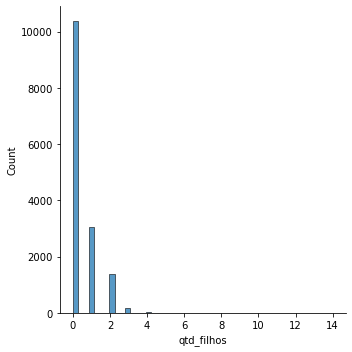

In [26]:
plt.clf()
var='qtd_filhos'

sns.displot(df, x=var, bins=50)
plt.show()

In [27]:
df=df.dropna()

In [28]:
# Tirando a v. resposta da base de treinamento
x = df.drop("renda",axis = 1)
y = df["renda"]

# Tirando ID da base de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [29]:
df.max()

Unnamed: 0                           14999
id_cliente                           16649
posse_de_veiculo                      True
posse_de_imovel                       True
qtd_filhos                              14
idade                                   67
tempo_emprego                    42.906849
qt_pessoas_residencia                 15.0
renda                            245141.67
data_ref_2015-01-01                      1
data_ref_2015-03-01                      1
data_ref_2015-04-01                      1
data_ref_2015-05-01                      1
data_ref_2015-06-01                      1
data_ref_2015-07-01                      1
data_ref_2015-08-01                      1
data_ref_2015-09-01                      1
data_ref_2015-10-01                      1
data_ref_2015-11-01                      1
data_ref_2015-12-01                      1
data_ref_2016-01-01                      1
data_ref_2016-02-01                      1
data_ref_2016-03-01                      1
sexo_M     

In [30]:
df.min()

Unnamed: 0                              0
id_cliente                              1
posse_de_veiculo                    False
posse_de_imovel                     False
qtd_filhos                              0
idade                                  22
tempo_emprego                    0.117808
qt_pessoas_residencia                 1.0
renda                              118.71
data_ref_2015-01-01                     0
data_ref_2015-03-01                     0
data_ref_2015-04-01                     0
data_ref_2015-05-01                     0
data_ref_2015-06-01                     0
data_ref_2015-07-01                     0
data_ref_2015-08-01                     0
data_ref_2015-09-01                     0
data_ref_2015-10-01                     0
data_ref_2015-11-01                     0
data_ref_2015-12-01                     0
data_ref_2016-01-01                     0
data_ref_2016-02-01                     0
data_ref_2016-03-01                     0
sexo_M                            

In [31]:
normalizador=StandardScaler()

In [32]:
df=df[['posse_de_veiculo','posse_de_imovel','qtd_filhos',	'idade','tempo_emprego','qt_pessoas_residencia','renda']]

In [33]:
df[['posse_de_veiculo','posse_de_imovel','qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','renda']]=normalizador.fit_transform(df[['posse_de_veiculo','posse_de_imovel','qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','renda']])

In [34]:
x=df.drop('renda',axis=1).values
y=df['renda'].values

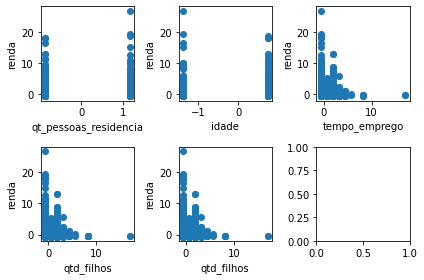

In [35]:
fig,ax =plt.subplots(2,3)
ax[0,0].scatter(x[:,0],y);
ax[0,0].set_xlabel('qt_pessoas_residencia');
ax[0,0].set_ylabel('renda');

ax[0,1].scatter(x[:,1],y);
ax[0,1].set_xlabel('idade');
ax[0,1].set_ylabel('renda');

ax[0,2].scatter(x[:,2],y);
ax[0,2].set_xlabel('tempo_emprego');
ax[0,2].set_ylabel('renda');

ax[1,0].scatter(x[:,2],y);
ax[1,0].set_xlabel('qtd_filhos');
ax[1,0].set_ylabel('renda');
plt.tight_layout();
ax[1,1].scatter(x[:,2],y);
ax[1,1].set_xlabel('qtd_filhos');
ax[1,1].set_ylabel('renda');
plt.tight_layout();

In [36]:
#Aplicando a Regressão ridge
from sklearn.linear_model import Ridge
#Aplicando inicialmente com alpha = 0

modelo1=Ridge(alpha=0)
modelo1.fit(x,y)
modelo1

Ridge(alpha=0)

In [37]:
score1=modelo1.score(x,y)
score1

0.16275520156725354

In [38]:
lambdas=[0, 0.001, 0.005, 0.01, 0.05, 0.1]

In [39]:
scores=[]

In [40]:
for i in range(len(lambdas)):
  modelo1=Ridge(alpha=lambdas[i])
  modelo1.fit(x,y)
  score=modelo1.score(x,y)
  scores.append(score)

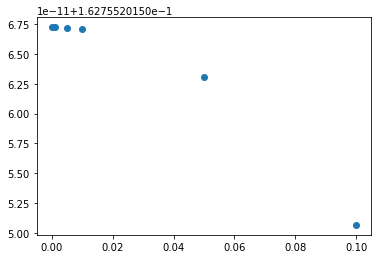

In [41]:
plt.scatter(lambdas,scores);

In [42]:
# Modelo escolhido
modelo_final=Ridge(alpha=0.05)
modelo_final.fit(x,y)
Y_predict=modelo_final.predict(x)

# extraindo os coeficientes
slope = modelo_final.coef_
intercept = modelo_final.intercept_
print("b0: \t{}".format(intercept))
print("b1: \t{}".format(slope[0]))

b0: 	-4.342524498123504e-17
b1: 	0.1086483653293346


In [46]:
# Modelo escolhido
modelo_final=Lasso(alpha=0.05)
modelo_final.fit(x,y)
Y_predict=modelo_final.predict(x)

model = sm.OLS(y, x).fit()

model

In [47]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.163
Model:                            OLS   Adj. R-squared (uncentered):              0.162
Method:                 Least Squares   F-statistic:                              402.4
Date:                Fri, 13 Oct 2023   Prob (F-statistic):                        0.00
Time:                        21:09:51   Log-Likelihood:                         -16529.
No. Observations:               12427   AIC:                                  3.307e+04
Df Residuals:                   12421   BIC:                                  3.312e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [48]:
# Iterate through the independent variables and add the most significant variable
# to the model at each step
def stepwise_selection(x,y,
                       initial_list=[],
                       threshold_in=0.05,
                       threshold_out=0.05,
                       verbose=True):

  included=list(initial_list)
  while True:

    pvalues = model.pvalues.iloc[1:]

    # Find the variable with the lowest p-value
    min_pvalue = pvalues.min()

    # Check if the lowest p-value is less than our significance level (e.g., 0.05)
    if min_pvalue < 0.05:
        # Add the variable with the lowest p-value to the model
        variable = pvalues.idxmin()
        model = sm.OLS(y, sm.add_constant(x[[variable]])).fit()
    else:
        # Break the loop if no more variables can be added
        break


In [49]:
# Print the summary of the final model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.163
Model:                            OLS   Adj. R-squared (uncentered):              0.162
Method:                 Least Squares   F-statistic:                              402.4
Date:                Fri, 13 Oct 2023   Prob (F-statistic):                        0.00
Time:                        21:10:01   Log-Likelihood:                         -16529.
No. Observations:               12427   AIC:                                  3.307e+04
Df Residuals:                   12421   BIC:                                  3.312e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [50]:
reg_1=DecisionTreeRegressor(max_depth=2)
reg_2=DecisionTreeRegressor(max_depth=8)

reg_1.fit(x,y)
reg_2.fit(x,y)

DecisionTreeRegressor(max_depth=8)

In [51]:
mse1=reg_1.score(x,y)
mse2=reg_2.score(x,y)

template="O R-quadrado da árvore com profundidade={0} e:{1:.2f}"

print(template.format(reg_1.get_depth(),mse1).replace(".",","))
print(template.format(reg_2.get_depth(),mse2).replace(".",","))

O R-quadrado da árvore com profundidade=2 e:0,16
O R-quadrado da árvore com profundidade=8 e:0,49


Avalie a previsão mediana do log renda na base de treino e test

In [57]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [58]:
y_predict=model.predict(x_test)

In [59]:
y_predict,y_test

(array([ 4884.52698427,  5395.08045194,   392.03413853, ...,
        17556.76503741,  1753.26279346,  1797.18220504]),
 14812     1705.55
 11591     1748.99
 13436     1733.67
 14948     2378.25
 14509     1957.87
            ...   
 5607     11816.81
 4926      8922.74
 12008    13070.17
 8072      3750.94
 9495      2581.24
 Name: renda, Length: 3107, dtype: float64)

In [60]:
from sklearn import metrics
r_squared=metrics.r2_score(y_test,y_predict)
print('R-squared Error Associeted with Simple Linear Regression:',r_squared)

R-squared Error Associeted with Simple Linear Regression: 0.29483410927653386


In [61]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_predict)

0.29483410927653386

In [62]:
mean_absolute_error(y_test,y_predict)

3878.9389581167857

In [63]:
mean_squared_error(y_test,y_predict)

39930486.188016176

In [64]:
np.sqrt(mean_squared_error(y_test,y_predict))

6319.05738128846